Portobello Tech is an app innovator who has devised an intelligent way of 
predicting employee turnover within the company. It periodically evaluates 
employees' work details, including the number of projects they worked on, 
average monthly working hours, time spent in the company, promotions in the 
last five years, and salary level. 
Data from prior evaluations shows the employees’ satisfaction in the workplace. 
The data could be used to identify patterns in work style and their interest in 
continuing to work for the company.  
The HR Department owns the data and uses it to predict employee turnover. 
Employee turnover refers to the total number of workers who leave a company 
over time. 
As the ML Developer assigned to the HR Department, you have been asked to 
create ML programs to: 
1. Perform data quality checks by checking for missing values, if any. 
2. Understand what factors contributed most to employee turnover at EDA. 
3. Perform clustering of employees who left based on their satisfaction and 
   evaluation. 
4. Handle the left Class Imbalance using the SMOTE technique.
5. Perform k-fold cross-validation model training and evaluate performance. 
6. Identify the best model and justify the evaluation metrics used.  
7. Suggest various retention strategies for targeted employees. 

Importing the required libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the data into a DataFrame

In [8]:
##Importing HR data
HRdatadf= pd.read_csv(r'C:\Users\nithi\Desktop\Renu\Data Science\Machine Learning\Python Notebook\Course End Project\archive (2)\HR_comma_sep.csv')

In [9]:
HRdatadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


From the information in dataset we could see there are 10 features and 14999 observations. All columns have same non-null count indicating there is no missing values.

In [10]:
HRdatadf.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Dependent variable is left indicating employee churn.
Let us split data into numerical and categorical

Numerical columns

In [11]:
numcols=HRdatadf.select_dtypes(np.number)
numcols.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

Categorical columns

In [12]:
objcols=HRdatadf.select_dtypes(include=[object])
objcols.columns

Index(['sales', 'salary'], dtype='object')

In [13]:
objcols['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [14]:
objcols['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

Performing Exploratory Data Aanlysis on numeric columns

In [15]:
numcols.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [16]:
numcols.cov()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,0.061817,0.004469,-0.043814,-0.248945,-0.036618,0.005133,-0.041128,0.000919
last_evaluation,0.004469,0.029299,0.073703,2.904356,0.032888,-0.000428,0.000479,-0.000214
number_project,-0.043814,0.073703,1.519284,25.683271,0.354166,-0.002055,0.012488,-0.001078
average_montly_hours,-0.248945,2.904356,25.683271,2494.313175,9.316364,-0.178169,1.516419,-0.025541
time_spend_company,-0.036618,0.032888,0.354166,9.316364,2.131998,0.001089,0.090066,0.014206
Work_accident,0.005133,-0.000428,-0.002055,-0.178169,0.001089,0.123706,-0.023163,0.001992
left,-0.041128,0.000479,0.012488,1.516419,0.090066,-0.023163,0.181411,-0.003797
promotion_last_5years,0.000919,-0.000214,-0.001078,-0.025541,0.014206,0.001992,-0.003797,0.020817


In [17]:
numcols.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

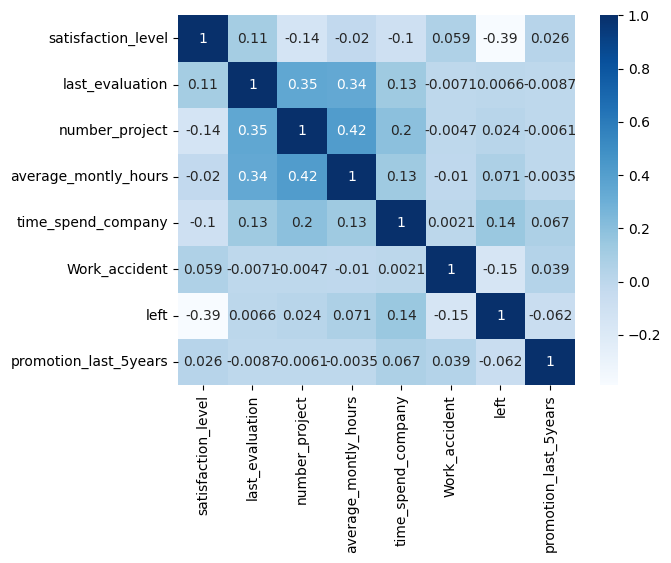

In [18]:
sns.heatmap(numcols.corr(),cmap='Blues',annot=True)

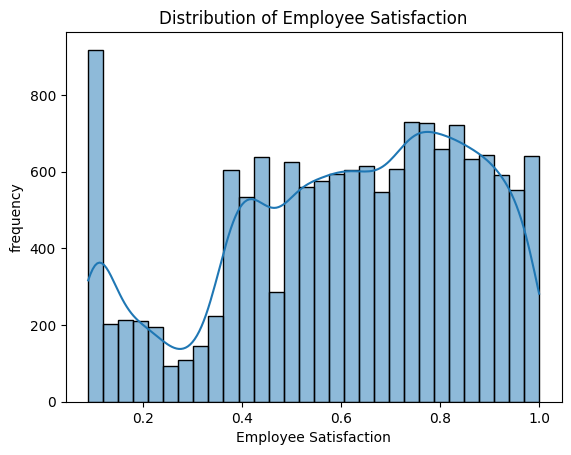

In [19]:

sns.histplot(numcols['satisfaction_level'],kde=True)
plt.title('Distribution of Employee Satisfaction')
plt.xlabel('Employee Satisfaction')
plt.ylabel('frequency')
plt.show()

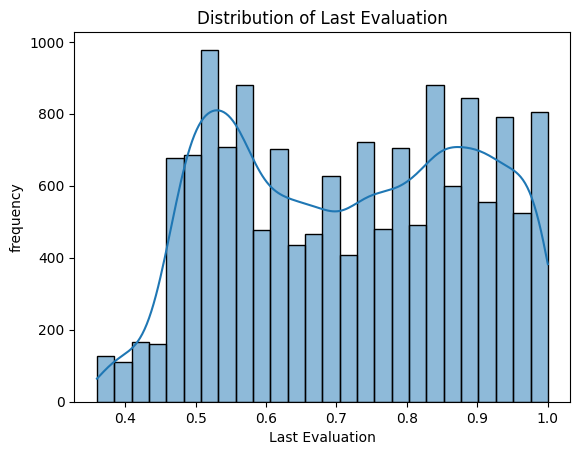

In [20]:
sns.histplot(numcols['last_evaluation'],kde=True)
plt.title('Distribution of Last Evaluation')
plt.xlabel('Last Evaluation')
plt.ylabel('frequency')
plt.show()

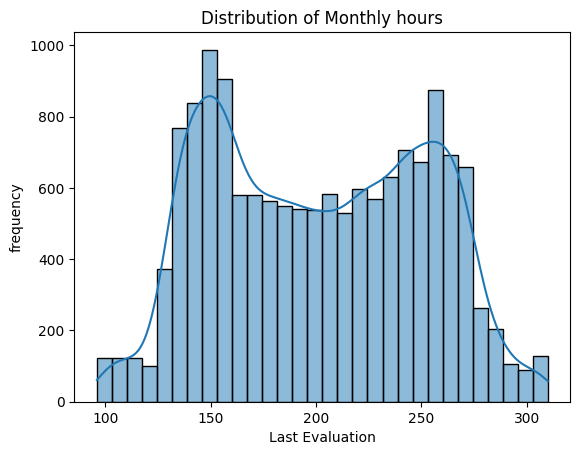

In [21]:
sns.histplot(numcols['average_montly_hours'],kde=True)
plt.title('Distribution of Monthly hours')
plt.xlabel('Last Evaluation')
plt.ylabel('frequency')
plt.show()

<Axes: xlabel='number_project', ylabel='count'>

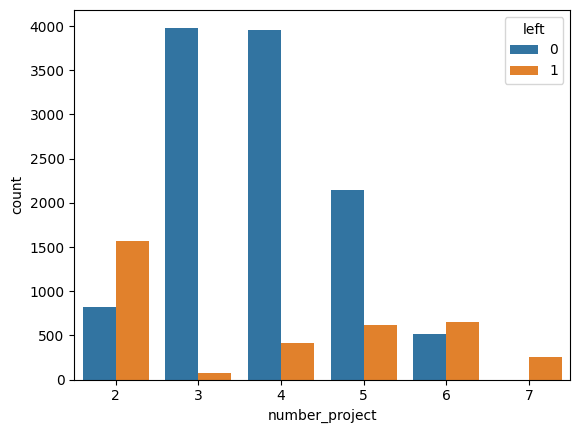

In [22]:
sns.countplot(data=numcols,x='number_project',hue='left')

From above plot most employees stayed in the company if they are involved in atleast 3 projects. Most employees left if they are only involved in 2 projects indicating the reason as lask of engagement or boredom.
Also from the graph it can be interpreted that when number of projects is high like 6 or 7 many people left indicating they are burned out or workload pressure.

Scaling the numerical columns usifn Standard Scaler

In [23]:
##Scaling the numerical columns
from sklearn.preprocessing import StandardScaler

In [24]:
numcols=numcols.drop('left',axis=1)

In [25]:
numcols_scaled=StandardScaler().fit_transform(numcols)
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [26]:
numcols_scaled.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412


In [27]:
objcols.columns

Index(['sales', 'salary'], dtype='object')

In [28]:
for col in objcols.columns:
    freq=objcols[col].value_counts()
    print(freq)

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64
salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64


In [29]:
## Dummy encoding objcols to convert to binary
objcols_dummy=pd.get_dummies(objcols)

In [30]:
objcols_dummy.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,False,False,False,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,False,False,True
2,False,False,False,False,False,False,False,True,False,False,False,False,True
3,False,False,False,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,False,True,False


In [31]:
HRdatadf_final=pd.concat([numcols_scaled,objcols_dummy],axis=1)
HRdatadf_final['left']=HRdatadf['left']

Performing clustering of employees who left based on their satisfaction and 
evaluation. 

In [32]:
from sklearn.cluster import KMeans

In [33]:
wcss=[]
for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(HRdatadf_final[['satisfaction_level','last_evaluation']])
    wcss.append(kmeans.inertia_)##inertia is wcss


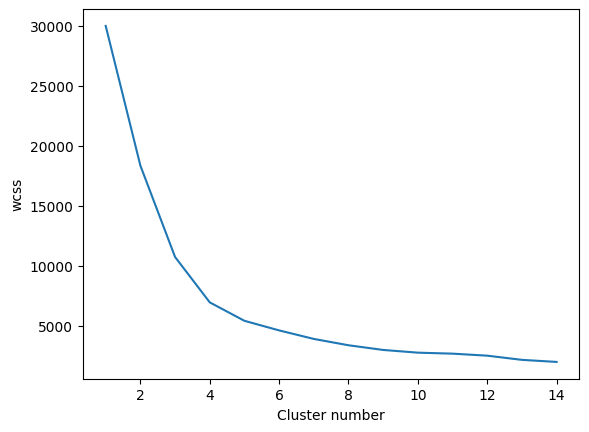

In [34]:
plt.plot(range(1,15),wcss)
plt.xlabel('Cluster number')
plt.ylabel('wcss')
plt.show()

In [35]:
clust_final=KMeans(n_clusters=3,random_state=42).fit(HRdatadf_final[['satisfaction_level','last_evaluation']])

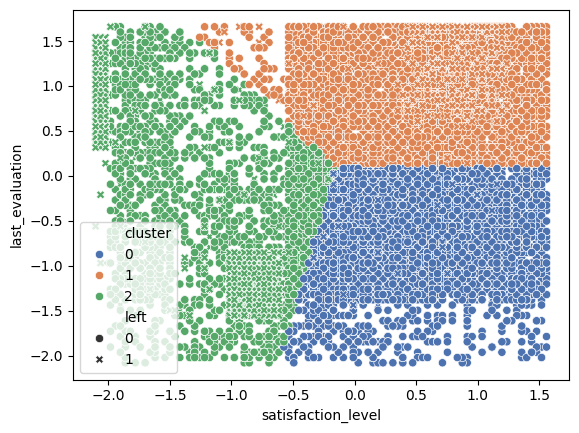

In [36]:
HRdatadf_final['cluster']=clust_final.labels_
sns.scatterplot(data=HRdatadf_final,x='satisfaction_level',y='last_evaluation',hue='cluster',style='left',palette='deep')
plt.show()

In [37]:
pd.crosstab(HRdatadf_final['cluster'],HRdatadf_final['left'])

left,0,1
cluster,,
0,4542,71
1,4566,955
2,2320,2545


From clustering we could see employees tend to  stay with the company if they are satisfied indicating cluster 0 where the evaluation rating was less but satisfaction level was high. They tend to leave if their satisfaction level is low even if they got high evaluation rating from cluster 2.


From the data there is a chance that no of observations for left=1 is less compared to left=0. So let us correct the imbalance in data.Below pie diagram shows 76% of observation is positive and only 24% of observations are for negative cases. The available dataset is small so we can opt for oversampling technique to balance the data. 

In [38]:
HRdatadf_final.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium', 'left', 'cluster'],
      dtype='object')

In [39]:
X=HRdatadf_final.drop(['left','cluster'],axis=1)
y=HRdatadf_final['left']

<Axes: ylabel='count'>

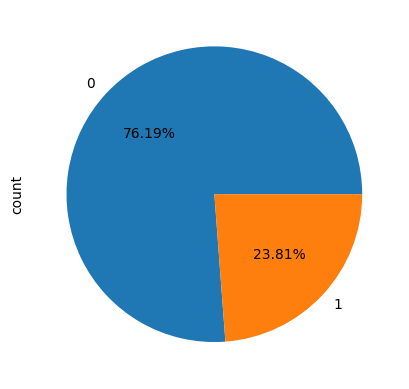

In [40]:
y.value_counts().plot(kind="pie",autopct="%.2f%%")

Creating train and test data in 80:20 ratio.

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

We are using over sampling method SMOTE to balance the data

In [43]:
##We are using SMOTENC() as we have categorical and numerical variables.
from imblearn.over_sampling import SMOTENC

In [44]:
smote=SMOTENC(categorical_features=['sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'])
X_smote,y_smote=smote.fit_resample(X_train,y_train)

In [45]:
print(y.value_counts())
print(pd.DataFrame(y_smote).value_counts())

left
0    11428
1     3571
Name: count, dtype: int64
left
0       9137
1       9137
Name: count, dtype: int64


Now the number of observations for each of the left values are balanced.

Build a Linear Regression model to predict employee turn over

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logisitc_smote=LogisticRegression().fit(X_smote,y_smote)
logisitc_smote.score(X_smote,y_smote)

0.782040056911459

In [48]:
logistic_predict=logisitc_smote.predict(X_smote)

In [49]:
pd.crosstab(y_smote,logistic_predict)

col_0,0,1
left,,
0,6876,2261
1,1722,7415


In [50]:
(6887+7432)/(6887+2250+1705+7432)

0.7835722884973186

In [51]:
logisitc_smote.intercept_

array([2.35015469])

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_smote,logistic_predict))

              precision    recall  f1-score   support

           0       0.80      0.75      0.78      9137
           1       0.77      0.81      0.79      9137

    accuracy                           0.78     18274
   macro avg       0.78      0.78      0.78     18274
weighted avg       0.78      0.78      0.78     18274



Build a Random Forest Classifier 

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
RFmodel=RandomForestClassifier(n_estimators=300,max_depth=10).fit(X_smote,y_smote)

In [56]:
RFmodel.score(X_smote,y_smote)

0.9760862427492613

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
cross_val_score(RFmodel,X_smote,y_smote,cv=5)

array([0.96060192, 0.96880985, 0.97838577, 0.97236662, 0.97126437])

In [59]:
RF_predict=RFmodel.predict(X_smote)

pd.crosstab(y_smote,RF_predict)

col_0,0,1
left,,
0,9100,37
1,400,8737


In [60]:
print(classification_report(y_smote,RF_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      9137
           1       1.00      0.96      0.98      9137

    accuracy                           0.98     18274
   macro avg       0.98      0.98      0.98     18274
weighted avg       0.98      0.98      0.98     18274



Builiding Gradient Boost Classifier Model

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
gbm=GradientBoostingClassifier(n_estimators=1500).fit(X_smote,y_smote)

In [63]:
gbm.score(X_smote,y_smote)

0.9977563751778483

In [64]:
cross_val_score(gbm,X_smote,y_smote,cv=5)

array([0.974829  , 0.98221614, 0.9876881 , 0.99151847, 0.98960044])

In [65]:
gbm_predict=gbm.predict(X_smote)
pd.crosstab(y_smote,gbm_predict)

col_0,0,1
left,,
0,9125,12
1,29,9108


In [66]:
print(classification_report(y_smote,gbm_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9137
           1       1.00      1.00      1.00      9137

    accuracy                           1.00     18274
   macro avg       1.00      1.00      1.00     18274
weighted avg       1.00      1.00      1.00     18274



Finding the ROC/AUC for each of the above model and plotting the ROC curve

In [67]:
from sklearn.metrics import RocCurveDisplay

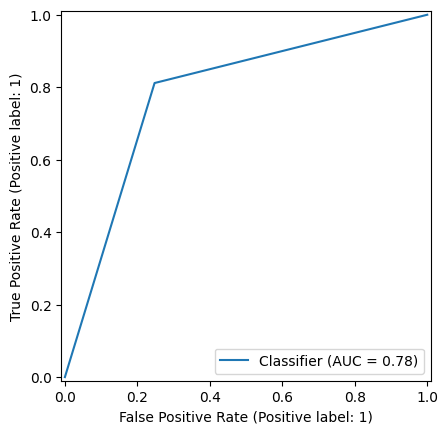

In [68]:
RocCurveDisplay.from_predictions(y_smote,logistic_predict)

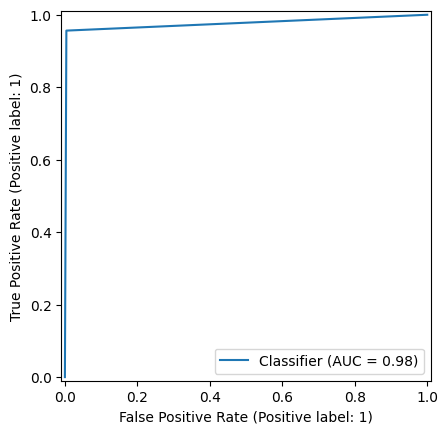

In [69]:
RocCurveDisplay.from_predictions(y_smote,RF_predict)

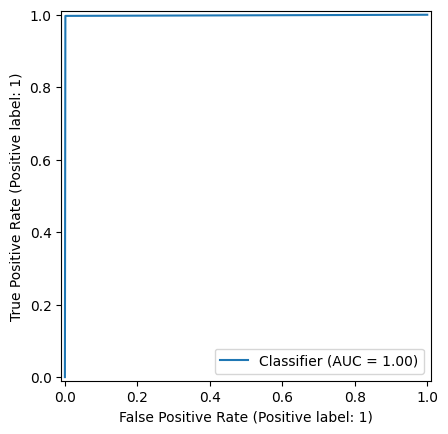

In [70]:
RocCurveDisplay.from_predictions(y_smote,gbm_predict)

From the ROC curve GBM has the perfect ROC curve with AUC=1.00 . Let us find confusion matrix as well for each of these models.

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Confusion matrix for Logistic Regression model

[[6876 2261]
 [1722 7415]]


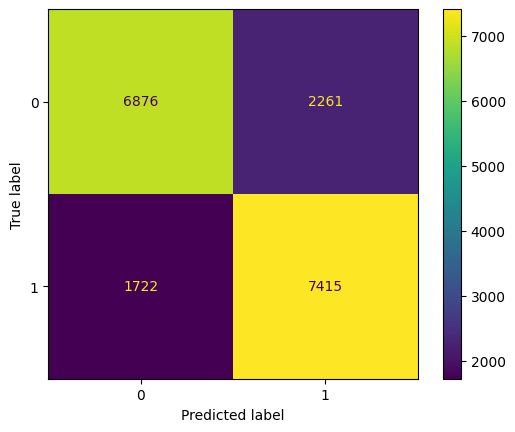

In [72]:
cm_Logistic=confusion_matrix(y_smote,logistic_predict)
print(cm_Logistic)
disp_logistic=ConfusionMatrixDisplay(confusion_matrix=cm_Logistic)
disp_logistic.plot()

Confusion Matrix for Random Forest Classifier

[[9100   37]
 [ 400 8737]]


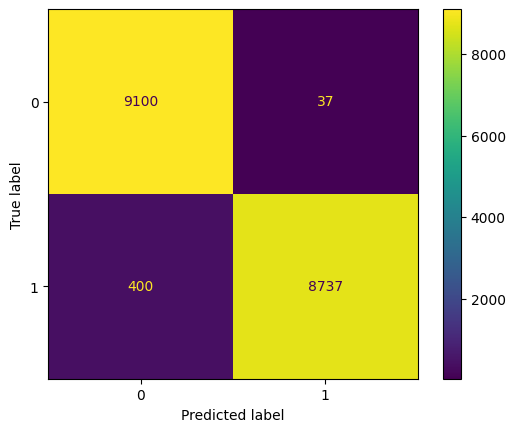

In [74]:
cm_RFM= confusion_matrix(y_smote,RF_predict)
print(cm_RFM)
disp_RFM=ConfusionMatrixDisplay(confusion_matrix=cm_RFM)
disp_RFM.plot()

Confusion Matrix for Gradient Boost Classifier

[[9125   12]
 [  29 9108]]


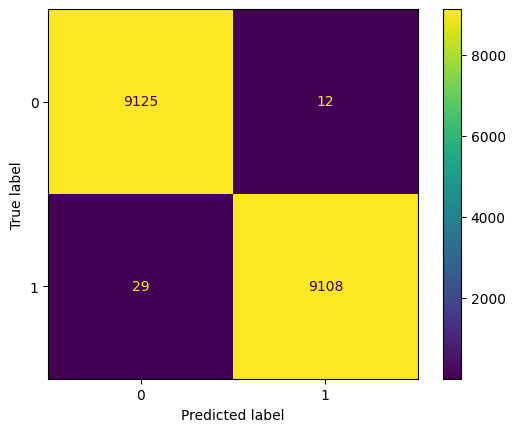

In [76]:
cm_GBM=confusion_matrix(y_smote,gbm_predict)
print(cm_GBM)
disp_GBM=ConfusionMatrixDisplay(confusion_matrix=cm_GBM)
disp_GBM.plot()

Since the company wants to retain the employees and we have to go with Recall metrics here. How many positives are identified as positives correctly. If the model correctly predicted an employee will leave company can take measures to retain him. Even if there are some false predictions it will still help improve the satisfaction of employees.

Verifying which model works better with test data

Logistic Regression Model

In [84]:
logistic_predict_test_data=logisitc_smote.predict(X_test)
print(classification_report(y_test,logistic_predict_test_data))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      2291
           1       0.49      0.79      0.61       709

    accuracy                           0.76      3000
   macro avg       0.71      0.77      0.72      3000
weighted avg       0.82      0.76      0.77      3000



In [88]:
cross_val_score(logisitc_smote,X_test,y_test,cv=5)

array([0.78166667, 0.775     , 0.775     , 0.77166667, 0.79      ])

In [92]:
accuracy_score(y_test,logistic_predict_test_data)

0.7586666666666667

Random Forest Classifier 

In [85]:
RF_predict_test_data=RFmodel.predict(X_test)
print(classification_report(y_test,RF_predict_test_data))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2291
           1       0.97      0.93      0.95       709

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



In [89]:
cross_val_score(RFmodel,X_test,y_test,cv=5)

array([0.96833333, 0.96166667, 0.98166667, 0.97833333, 0.97833333])

In [93]:
accuracy_score(y_test,RF_predict_test_data)

0.977

Gradient Boosting Model

In [86]:
gbm_predict_test_data=gbm.predict(X_test)
print(classification_report(y_test,gbm_predict_test_data))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2291
           1       0.97      0.97      0.97       709

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [87]:
cross_val_score(gbm,X_test,y_test,cv=5)

array([0.96166667, 0.97166667, 0.97666667, 0.98666667, 0.98      ])

In [94]:
accuracy_score(y_test,gbm_predict_test_data)

0.9876666666666667

From above classification Report Gradient Boosting Algorithm works better with test data.

Categorizing employees into different Risk zones based on the probability score of their intention of leaving.

In [102]:
def categorize_emp(prob):
    if prob < 0.20:
        return 'Safe'
    elif prob > 0.20 and prob < 0.60:
        return 'Low Risk'
    elif prob > 0.60 and prob < 0.90:
        return 'Medium Risk'
    else:
        return 'High Risk'
        

Calculating probability score using Gradient Boosting Model

In [103]:
prob_score=gbm.predict_proba(X_test)[:,1]
print(prob_score)

[3.59847233e-03 4.29352586e-04 2.26377040e-06 ... 9.85001912e-01
 1.05422511e-02 4.28651322e-04]


Assigning risk labels based on probability score

In [104]:

for p in prob_score:
    risk_labels=categorize_emp(p)



Adding the attrition probability and risk label to the test data

In [107]:
X_test_risk=X_test.copy()
X_test_risk['Attrition Probability']=prob_score
X_test_risk['Risk Zone']=risk_labels
X_test_risk.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,...,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium,Attrition Probability,Risk Zone
6958,-0.292948,-0.269343,-0.651538,-0.942110,-1.026126,-0.411165,-0.147412,False,False,False,...,False,False,True,False,False,True,False,False,0.003598,Safe
7534,0.431041,-1.145699,-0.651538,-1.162368,0.343655,2.432112,-0.147412,False,False,False,...,False,False,False,True,False,False,True,False,0.000429,Safe
2975,1.356139,-0.619886,-0.651538,1.320540,-1.026126,-0.411165,-0.147412,False,True,False,...,False,False,False,False,False,False,True,False,0.000002,Safe
3903,0.672371,0.431741,-0.651538,0.039039,-1.026126,-0.411165,-0.147412,False,False,False,...,False,False,True,False,False,False,True,False,0.065772,Safe
8437,-0.051619,-1.846783,-0.651538,-1.102298,0.343655,2.432112,-0.147412,False,False,False,...,False,False,False,False,True,False,True,False,0.000002,Safe


Retention Strategies
For Safe zone employees- These employees are least likely to leave indicating they are satisfied. So providing Recognitions and Rewards and more career growth opportunities to retain them.
For Low risk employees- These employees may be contemplating to leave. More measures to understand their dissatisfaction reasons and providing solutions might help to retain them.
For Medium risk employees - More chance of leaving the company. May be direct conversations to understand the concerns and offering incentives or flexibility or more growth opportunities.
For High risk employees- Most likely to leave the company and immediate attention required. Evaluating their performance and compensation and workload and providing immediate incentives or promotion or other growth opportunities may help to retain them.Meanwhile company can also plan for contingency by finding a back up plan or replacement. 